# Bab 9 Extreme Learning Machine

## Praktikum

### a) Fungsi *Training* ELM

Tulis kode ke dalam *cell* di bawah ini:

In [63]:
import time
import numpy as np

def elm_fit(X, target, h, W=None):
  start_time = time.time()
  if W is None:
    W = np.random.uniform(-.1, .1, (h, len(X[0])))

  Hinit = X @ W.T
  H = 1 / (1 + np.exp(-Hinit))
  Ht = H.T
  Hp = np.linalg.inv(Ht @ H) @ Ht
  beta = Hp @ target
  y = H @ beta

  mape = sum(abs(y - target) / target) * 100 / len(target)

  execution = time.time() - start_time
  print("Waktu eksekusi: %s detik" % execution)

  return W, beta, mape, execution

### b) Fungsi *Testing* ELM

Tulis kode ke dalam *cell* di bawah ini:

In [64]:
def elm_predict(X, W, b, round_output=False):
  Hinit = X @ W.T
  H = 1 / (1 + np.exp(-Hinit))
  y = H @ b
  if round_output:
    y = [int(round(x)) for x in y]
  return y

### c) Klasifikasi *Dataset* Iris

![Iris Dataset](https://raw.githubusercontent.com/ApoorvRusia/SVM-classification-on-Iris-dataset/master/iris_types.jpg)

Tulis kode ke dalam *cell* di bawah ini:

In [65]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = minmax_scale(iris.data)
Y = iris.target
Y += 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)
W, b, mape, _ = elm_fit(X_train, y_train, 3)
print('MAPE:', mape)

output = elm_predict(X_test, W, b, round_output=True)
accuracy = accuracy_score(output, y_test)

print('Output:', output)
print('True :', y_test)
print('Accuracy:', accuracy)

Waktu eksekusi: 0.0010008811950683594 detik
MAPE: 15.331135580891765
Output: [2, 2, 1, 2, 3, 2, 1, 1, 2, 1, 3, 1, 2, 2, 1, 3, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 1, 4]
True : [2 2 1 2 3 1 1 1 2 1 3 1 2 2 1 3 1 3 1 3 1 2 3 3 3 1 2 1 2 2 3 1 1 1 2 2 2
 2 3 2 3 2 3 1 3]
Accuracy: 0.8222222222222222


## Soal-Soal

### 1) Pengujian algoritma ELM dengan jumlah hidden neuron yang berbeda-beda

In [66]:
iris = datasets.load_iris()
X = minmax_scale(iris.data)
Y = iris.target
Y += 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)


list_hidden_neuron = [3, 5, 7, 10, 30]
list_result = []

for num_hidden in list_hidden_neuron:
  W, b, mape, execution = elm_fit(X_train, y_train, num_hidden)
  print('MAPE:', mape)

  output = elm_predict(X_test, W, b, round_output=True)
  accuracy = accuracy_score(output, y_test)

  print(f'Jumlah hidden neuron : {num_hidden}')
  print('Output:', output)
  print('True :', y_test)
  print('Accuracy:', accuracy)
  print()

  result = [mape, execution, accuracy]
  list_result.append(result)

Waktu eksekusi: 0.0 detik
MAPE: 10.061582154862672
Jumlah hidden neuron : 3
Output: [1, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 2, 1, 2, 3, 2, 1, 1, 1, 3, 2, 3, 1, 1, 2, 2]
True : [1 3 2 2 3 3 3 3 3 1 3 1 2 3 1 3 2 3 1 2 3 2 2 2 2 3 1 2 2 3 2 1 2 3 3 1 1
 1 3 3 3 1 1 2 2]
Accuracy: 0.8888888888888888

Waktu eksekusi: 0.0 detik
MAPE: 8.522732586632287
Jumlah hidden neuron : 5
Output: [1, 3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 1, 2, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 2, 2]
True : [1 3 2 2 3 3 3 3 3 1 3 1 2 3 1 3 2 3 1 2 3 2 2 2 2 3 1 2 2 3 2 1 2 3 3 1 1
 1 3 3 3 1 1 2 2]
Accuracy: 0.9777777777777777

Waktu eksekusi: 0.0 detik
MAPE: 8.083193336592629
Jumlah hidden neuron : 7
Output: [1, 3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 1, 2, 3, 3, 1, 1, 1, 4, 2, 3, 1, 1, 2, 2]
True : [1 3 2 2 3 3 3 3 3 1 3 1 2 3 1 3 2 3 1 2 3 2 2 2 2 3 1 2 2 3 2 1 2 3 3 1 1


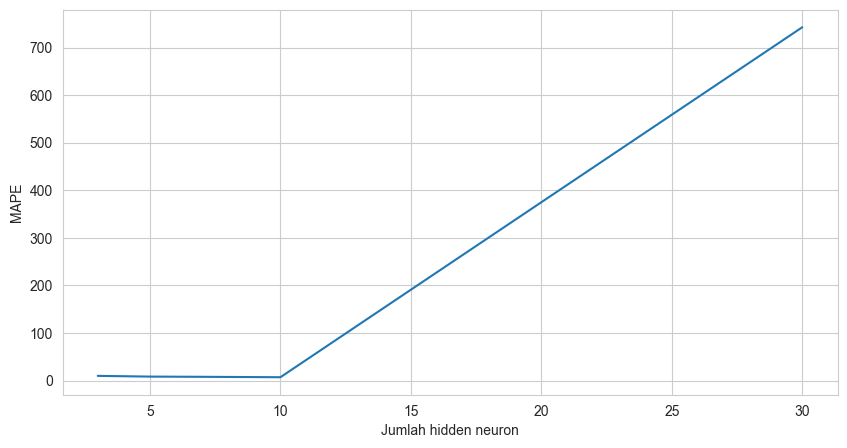

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.plot(list_hidden_neuron, [x[0] for x in list_result], label='MAPE')
plt.xlabel('Jumlah hidden neuron')
plt.ylabel('MAPE')
plt.show()


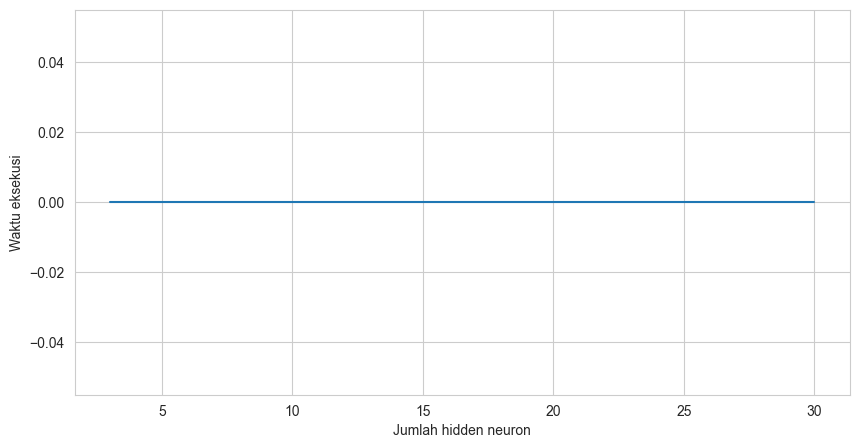

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(list_hidden_neuron, [x[1] for x in list_result], label='Waktu eksekusi')
plt.xlabel('Jumlah hidden neuron')
plt.ylabel('Waktu eksekusi')
plt.show()

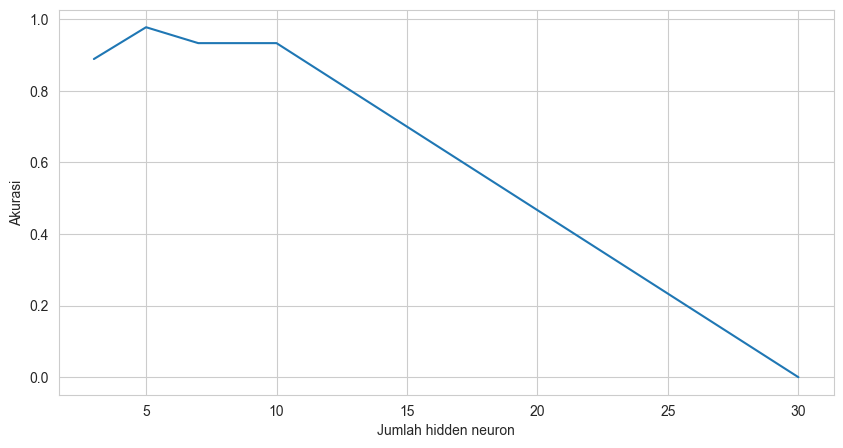

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(list_hidden_neuron, [x[2] for x in list_result], label='Akurasi')
plt.xlabel('Jumlah hidden neuron')
plt.ylabel('Akurasi')
plt.show()

### 2)

#### a) Menggunakan metode backpropagation

In [75]:
from backpropagation_tool import *

iris = datasets.load_iris()
X = minmax_scale(iris.data)
Y = onehot_enc(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3,random_state=1)
w, ep, mse = bp_fit(X_train, y_train, layer_conf=(4, 3, 3), learn_rate=.1, max_epoch=100, max_error=.5, print_per_epoch=25)

print(f'Epochs: {ep}, MSE: {mse}')
predict = bp_predict(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

Epochs: 23, MSE: 0.48584166858445516
Output: [0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2]
True : [0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1]
Accuracy: 0.6


c:\Users\tridi\OneDrive\Documents\KULIAH\JARINGAN SARAF TIRUAN\PRAKTIKUM\BAB 10\backpropagation_tool.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w += dw


#### b) Menggunakan metode ELM

In [81]:
iris = datasets.load_iris()
X = minmax_scale(iris.data)
Y = iris.target
Y += 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=1)
W, b, mape, _ = elm_fit(X_train, y_train, 3)
print('MAPE:', mape)

output = elm_predict(X_test, W, b, round_output=True)
accuracy = accuracy_score(output, y_test)

print('Output:', output)
print('True :', y_test)
print('Accuracy:', accuracy)

Waktu eksekusi: 0.0 detik
MAPE: 12.264184047703939
Output: [1, 2, 2, 1, 3, 2, 3, 1, 1, 3, 2, 1, 3, 2, 2, 1, 2, 2, 1, 1, 2, 2, 3, 1, 3, 2, 1, 1, 2, 3, 2, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 3, 2]
True : [1 2 2 1 3 2 3 1 1 3 2 1 3 2 2 1 2 2 1 1 2 2 2 1 3 2 1 1 2 3 2 3 2 3 3 1 2
 1 2 3 3 1 3 3 2]
Accuracy: 0.9555555555555556
